In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
from sklearn.datasets import load_boston

In [2]:
boston = load_boston()

J:\python\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.
 

In [3]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

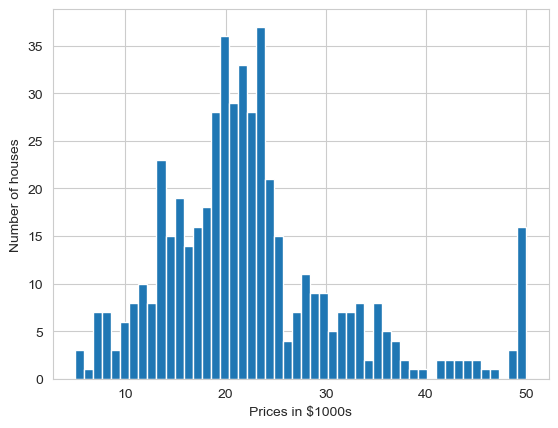

In [4]:
plt.hist(boston.target, bins=50)
plt.xlabel('Prices in $1000s')
plt.ylabel('Number of houses')
plt.show()

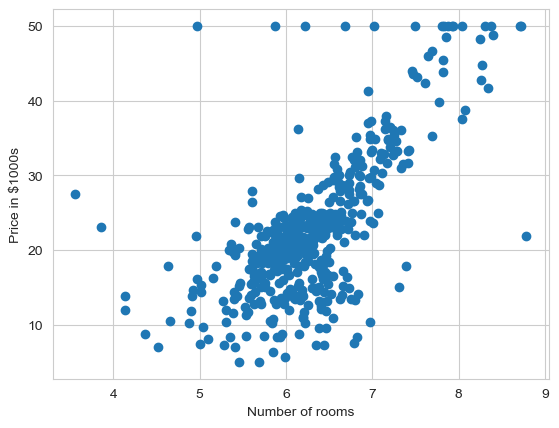

In [5]:
plt.scatter(boston.data[:, 5], boston.target)
plt.ylabel("Price in $1000s")
plt.xlabel('Number of rooms')
plt.show()

In [6]:
df = DataFrame(boston.data)

df.columns = boston.feature_names
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
df['Prices'] = boston.target

In [8]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Prices
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


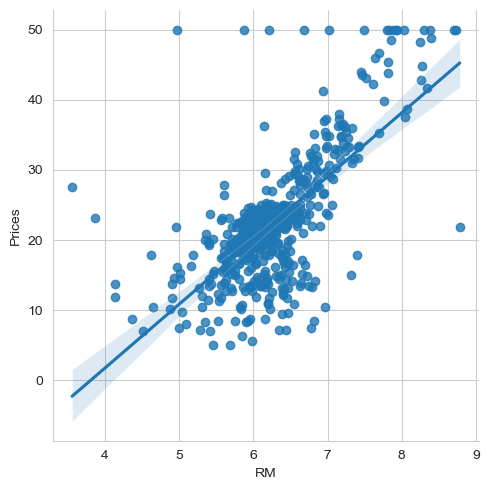

In [9]:
sns.lmplot(x='RM', y="Prices", data=df)
plt.show()

In [10]:
X = df.RM
X.shape

(506,)

In [11]:
A = np.vstack([X, np.ones(len(X))]).T

In [12]:
A.shape

(506, 2)

In [13]:
Y = df.Prices

In [14]:
# Create an array [x 1]
A = np.array([[value, 1] for value in X]) #create list comprehensive

In [15]:
A

array([[6.575, 1.   ],
       [6.421, 1.   ],
       [7.185, 1.   ],
       ...,
       [6.976, 1.   ],
       [6.794, 1.   ],
       [6.03 , 1.   ]])

In [16]:
# Create m and b value for best fit line
m, b = np.linalg.lstsq(A,Y, rcond=None)[0]

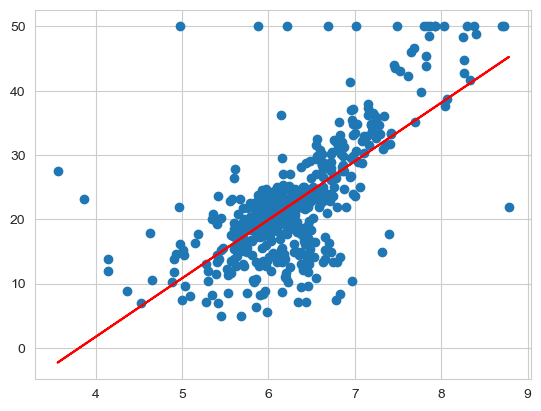

In [17]:
plt.plot(df.RM, df.Prices, "o")
x=df.RM
plt.plot(x, m*x +b, "r", label='Best Fit Line')
plt.show()

In [18]:
result = np.linalg.lstsq(A, Y, rcond=None)
error_total = result[1]
rmse = np.sqrt(error_total/len(A))
print("The root mean square error was %.2f" %rmse)

The root mean square error was 6.60


In [19]:
import sklearn
from sklearn.linear_model import LinearRegression

In [20]:
lreg = LinearRegression()

In [21]:
#Data Columns
X_multi = df.drop('Prices',1)
Y_target = df.Prices

C:\Users\mhose\AppData\Local\Temp\ipykernel_6584\2564668926.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_multi = df.drop('Prices',1)


In [22]:
lreg.fit(X_multi, Y_target)

LinearRegression()

In [23]:
print('The estimated intercept coefficient is %.2f' % lreg.intercept_)
print('The number of coefficient used was %d' %len(lreg.coef_))

The estimated intercept coefficient is 36.46
The number of coefficient used was 13


In [25]:
coeff_df = DataFrame(df.columns)
coeff_df.columns = ['Features']

coeff_df["Coefficient Estimated"] = Series(lreg.coef_)
coeff_df

,Features,Coefficient Estimated
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335


# Training and Validation

In [27]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(A, df.Prices)

In [30]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((379, 2), (127, 2), (379,), (127,))

In [32]:
lreg = LinearRegression()

lreg.fit(X_train, Y_train)

LinearRegression()

In [33]:
pred_train = lreg.predict(X_train)
pred_test = lreg.predict(X_test)

In [35]:
print("Fit a model X_train, and calculate the MSE with Y_train: %.2f" % np.mean(Y_train-pred_train)**2)

print("Fit a model X_train, and calculate the MSE with X_test and Y_test: %.2f" % np.mean(Y_test-pred_test)**2)

Fit a model X_train, and calculate the MSE with Y_train: 0.00
Fit a model X_train, and calculate the MSE with X_test and Y_test: 0.37


# Residual Plot

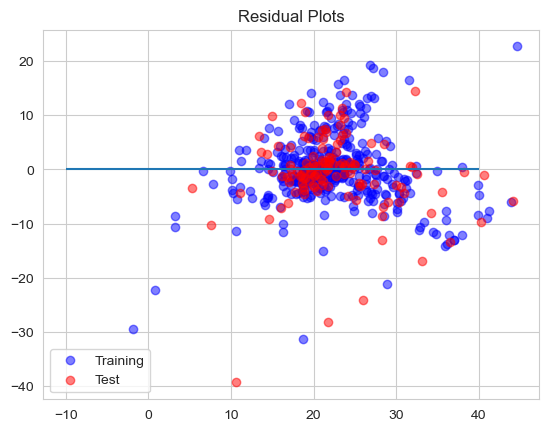

In [37]:
train = plt.scatter(pred_train,(pred_train-Y_train), color='blue', alpha=0.5)
test = plt.scatter(pred_test,(pred_test-Y_test), color='red', alpha=0.5)

plt.hlines(y=0, xmin=-10,xmax=40)
plt.legend((train, test),('Training', 'Test'),loc='lower left')
plt.title('Residual Plots')
plt.show()